# Comparing Kmeans Clusters vs. Community Detection

In [112]:
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import json

from batchup import data_source

from collections import Counter

from sklearn.cluster import KMeans, SpectralClustering

In [111]:
#!pip install batchup
#!pip install matplotlib==3.1.0

### Load in Community Detection Labels

In [67]:
with open('val_communities_10.json') as json_file:
    community_labels = json.load(json_file)

### Load in Model, Validation Spectrograms and Labels

In [4]:
models_path = '/datasets/home/21/321/ee228sp20ta1/G51/models/'
val_path = '/datasets/home/21/321/ee228sp20ta1/G51/val_set.npy'
val_ids_path = '/datasets/home/21/321/ee228sp20ta1/G51/val_ids.txt'

### Tokenize Labels for validation spectrogram 

In [39]:
f=open(val_ids_path, "r")
val_spec_ids = f.read()
val_spec_labels = val_spec_ids.split('\n')
# type(val_spec_labels)

list

### Preprocess validation spectrograms

In [6]:
X_valid = np.load(val_path)

x_valid = X_valid[:,:,:216].copy()
x_valid = x_valid.reshape((2763*96,216))

unscaled_val_set = x_valid.reshape(2763,96,216,1)

print(x_valid.shape)

scaler = MinMaxScaler().fit(x_valid) 

scaled_valid = scaler.transform(x_valid)


s_valid_reshaped = scaled_valid.reshape(2763,96,216,1)
val_set = s_valid_reshaped

(265248, 216)


### Define Model Architecture(s)

In [7]:
def AE_01():
    
    #### Encoder ####
    model = models.Sequential()
    model.add(keras.Input(shape=(96,216,1)))
    model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(45, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    #### Decoder ####
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2,2)))
    model.add(layers.Conv2D(45, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2,2)))
    model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2,2)))
    model.add(layers.Conv2D(1,(3, 3), padding='same'))
    
    return model

### Load in Weights

In [8]:
AE = AE_01()

# Restore the weights
AE.load_weights(models_path+'ae_01')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Create Batches of Validation Spectrograms

In [11]:
ds = data_source.ArrayDataSource([val_set])

latent_vecs = []

get_hl = K.function([AE.layers[0].input], [AE.layers[6].output])

for batch in ds.batch_iterator(batch_size=64, shuffle=False):
    
    AE_h1 = get_hl([batch])[0]
    latent_vecs.append(AE_h1)
    
latent_vecs = asarray(latent_vecs)

latent_vecs = np.concatenate(latent_vecs)
#print(latent_vecs.shape)

### Reshape latent vectors

In [15]:
latent_vectors = np.ndarray(shape=(2763,72,72))

for idx, spec in enumerate(val_set):
    latent_vec = latent_vecs[idx].reshape(72, 72)
    latent_vectors[idx] = latent_vec
    
# print(latent_vectors.shape)

In [17]:
reshaped_latent_vectors = latent_vectors.reshape(2763,5184)

### Run Kmeans Clustering

In [19]:
kmeans = KMeans(n_clusters=10, init='random', verbose =1).fit(reshaped_latent_vectors)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 26499.118269865456
start iteration
done sorting
end inner loop
Iteration 1, inertia 25760.353993522163
start iteration
done sorting
end inner loop
Iteration 2, inertia 25689.85777978473
start iteration
done sorting
end inner loop
Iteration 3, inertia 25642.0732950359
start iteration
done sorting
end inner loop
Iteration 4, inertia 25600.183794964552
start iteration
done sorting
end inner loop
Iteration 5, inertia 25563.164129934405
start iteration
done sorting
end inner loop
Iteration 6, inertia 25537.81664774965
start iteration
done sorting
end inner loop
Iteration 7, inertia 25522.123866752183
start iteration
done sorting
end inner loop
Iteration 8, inertia 25512.348032244474
start iteration
done sorting
end inner loop
Iteration 9, inertia 25505.43727325222
start iteration
done sorting
end inner loop
Iteration 10, inertia 25498.784720460764
start iteration
done sorting
end inner loop
Iteration 11

Iteration 23, inertia 25178.443460473514
start iteration
done sorting
end inner loop
Iteration 24, inertia 25174.813194645816
start iteration
done sorting
end inner loop
Iteration 25, inertia 25171.71313796372
start iteration
done sorting
end inner loop
Iteration 26, inertia 25168.799353650087
start iteration
done sorting
end inner loop
Iteration 27, inertia 25165.948843452847
start iteration
done sorting
end inner loop
Iteration 28, inertia 25162.655293260865
start iteration
done sorting
end inner loop
Iteration 29, inertia 25159.015796250842
start iteration
done sorting
end inner loop
Iteration 30, inertia 25153.598003568808
start iteration
done sorting
end inner loop
Iteration 31, inertia 25149.47243099124
start iteration
done sorting
end inner loop
Iteration 32, inertia 25147.373266443283
start iteration
done sorting
end inner loop
Iteration 33, inertia 25145.95951192862
start iteration
done sorting
end inner loop
Iteration 34, inertia 25144.249763129817
start iteration
done sortin

Iteration 26, inertia 25344.18118826427
start iteration
done sorting
end inner loop
Iteration 27, inertia 25341.65929547679
start iteration
done sorting
end inner loop
Iteration 28, inertia 25338.911310848387
start iteration
done sorting
end inner loop
Iteration 29, inertia 25337.516157120226
start iteration
done sorting
end inner loop
Iteration 30, inertia 25336.075038402527
start iteration
done sorting
end inner loop
Iteration 31, inertia 25335.384764305876
start iteration
done sorting
end inner loop
Iteration 32, inertia 25335.032975191905
start iteration
done sorting
end inner loop
Iteration 33, inertia 25334.85895218966
start iteration
done sorting
end inner loop
Iteration 34, inertia 25334.826972528594
start iteration
done sorting
end inner loop
Iteration 35, inertia 25334.742538717393
start iteration
done sorting
end inner loop
Iteration 36, inertia 25334.70761727842
start iteration
done sorting
end inner loop
Iteration 37, inertia 25334.67164190845
start iteration
done sorting


Iteration 7, inertia 25343.800444514967
start iteration
done sorting
end inner loop
Iteration 8, inertia 25336.955642384306
start iteration
done sorting
end inner loop
Iteration 9, inertia 25331.182588963646
start iteration
done sorting
end inner loop
Iteration 10, inertia 25327.389718197675
start iteration
done sorting
end inner loop
Iteration 11, inertia 25323.746635606272
start iteration
done sorting
end inner loop
Iteration 12, inertia 25321.254850218378
start iteration
done sorting
end inner loop
Iteration 13, inertia 25319.091298927568
start iteration
done sorting
end inner loop
Iteration 14, inertia 25316.069764492655
start iteration
done sorting
end inner loop
Iteration 15, inertia 25313.16331921557
start iteration
done sorting
end inner loop
Iteration 16, inertia 25309.557251767073
start iteration
done sorting
end inner loop
Iteration 17, inertia 25306.29257083004
start iteration
done sorting
end inner loop
Iteration 18, inertia 25304.10773479581
start iteration
done sorting
e

### Optional Visualize with TSNE

In [ ]:
# from sklearn.manifold import TSNE

# X_embedded = TSNE(n_components=2).fit_transform(reshaped_latent_vectors)

# import seaborn as sns
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# # palette = sns.color_palette("bright", 25)

# sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=com_labels, legend='full')


# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=com_labels)

### Sort and Align Kmean labels and Community Labels

In [71]:
kmeans_labels = dict()
for idx, label in zip(val_spec_labels, labels):
    kmeans_labels[idx] = label

sorted_kmeans_labels = dict(sorted(kmeans_labels.items()))

sorted_community_labels = dict(sorted(community_labels.items()))

#This should be True
sorted_community_labels.keys() == sorted_kmeans_labels.keys()

#Counter(list(sorted_kmeans_labels.values()))
#Counter(list(sorted_community_labels.values()))

### Plot Community Matrix

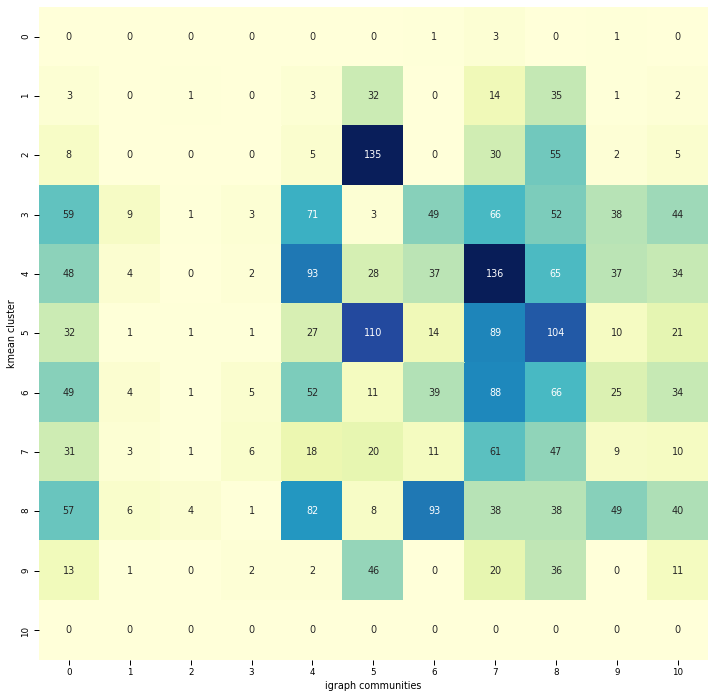

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set_context("paper")

labels = kmeans.labels_
community = list(sorted_community_labels.values())
kmeanclusters = list(sorted_kmeans_labels.values())

mat = confusion_matrix(community, kmeanclusters)
fig, ax = plt.subplots(figsize=(12,12))  

sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False, cmap="YlGnBu", ax=ax)
plt.xlabel('igraph communities')
plt.ylabel('kmean cluster');